### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [612]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [820]:
customer_coupons_data = pd.read_csv('data/coupons.csv')

In [822]:
customer_coupons_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [825]:
#Step:1 Eliminate Duplicates
#Step:2 Resolve Structural Errors
#Step:3 Filter Outliers
#Step:4 Handle Missing Data
#Step:5 Validate

In [827]:
#Step:1 Eliminate Duplicates

print("\nNumber of rows given:")
print(len(customer_coupons_data)) 
print("\nNumber of duplicate rows:")
print(customer_coupons_data.duplicated().sum())
customer_coupons_data.drop_duplicates(inplace=True)

print("\nNumber of rows after removing the duplicates:")
print(len(customer_coupons_data)) 


Number of rows given:
12684

Number of duplicate rows:
74

Number of rows after removing the duplicates:
12610


In [829]:
#Step:2 Resolve Structural Errors

# Noticed the column names of the coupons dataframe is inconsistent with upper and lower case text.
# Standardize column names to lowercase 
customer_coupons_data.columns = customer_coupons_data.columns.str.lower()  

# Fix inconsistent labels in a column (e.g., 'N/A' and 'not applicable' should be treated as the same)
customer_coupons_data = customer_coupons_data.replace({'N/A': 'not applicable', 'Not Applicable': 'not applicable'})

In [831]:
#Step:2 Resolve Structural Errors (Data Type Check)

print("\nData types of each column:")
print(customer_coupons_data.dtypes)

#Observed, that the below columns were int, but they should be boolean. As the data contained only boolean values.
#has_children
#tocoupon_geq5min         
#tocoupon_geq15min        
#tocoupon_geq25min        
#direction_same           
#direction_opp            
        

customer_coupons_data['has_children'] = customer_coupons_data['has_children'].astype('bool', errors='raise')  
customer_coupons_data['tocoupon_geq5min'] = customer_coupons_data['tocoupon_geq5min'].astype('bool', errors='raise')  
customer_coupons_data['tocoupon_geq15min'] = customer_coupons_data['tocoupon_geq15min'].astype('bool', errors='raise')  
customer_coupons_data['tocoupon_geq25min'] = customer_coupons_data['tocoupon_geq25min'].astype('bool', errors='raise')  
customer_coupons_data['has_children'] = customer_coupons_data['has_children'].astype('bool', errors='raise')  
customer_coupons_data['direction_same'] = customer_coupons_data['direction_same'].astype('bool', errors='raise')  


print("\nData types of each column:")
print(customer_coupons_data.dtypes)


Data types of each column:
destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalstatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
bar                     object
coffeehouse             object
carryaway               object
restaurantlessthan20    object
restaurant20to50        object
tocoupon_geq5min         int64
tocoupon_geq15min        int64
tocoupon_geq25min        int64
direction_same           int64
direction_opp            int64
y                        int64
dtype: object

Data types of each column:
destination             object
passanger               object
weather                 object
temperature              int64


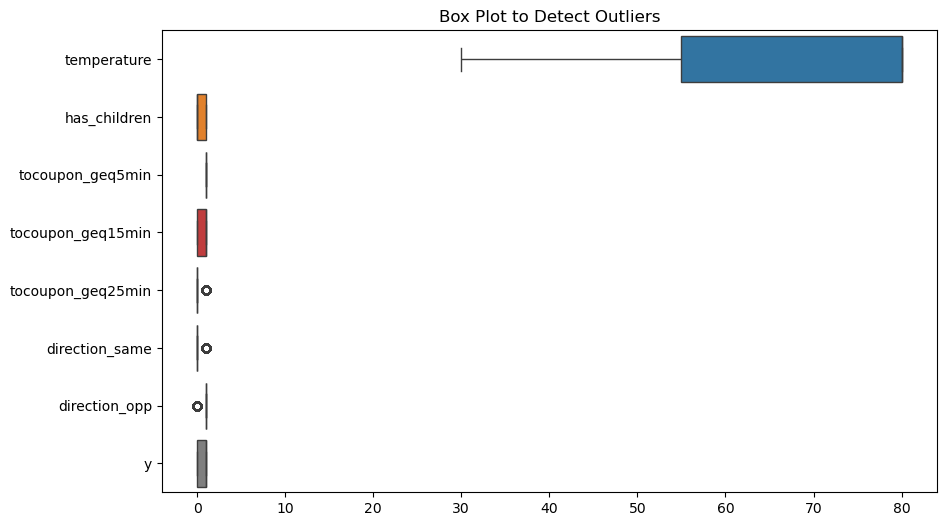

In [833]:
#Step:3 Filter Outliers
#1 - Verified for the outliers based on domain knowledge. All seems to be correct.
#2 - Plotting

plt.figure(figsize=(10, 6))
sns.boxplot(data=customer_coupons_data, orient="h")
plt.title('Box Plot to Detect Outliers')
plt.show()

In [834]:
# Step:4 Handle Missing Data
# Fill missing values in columns with the mode
customer_coupons_data['car'] = customer_coupons_data['car'].fillna(customer_coupons_data['car'].mode()[0])
customer_coupons_data['bar'] = customer_coupons_data['bar'].fillna(customer_coupons_data['bar'].mode()[0])
customer_coupons_data['coffeehouse'] = customer_coupons_data['coffeehouse'].fillna(customer_coupons_data['coffeehouse'].mode()[0])
customer_coupons_data['carryaway'] = customer_coupons_data['carryaway'].fillna(customer_coupons_data['carryaway'].mode()[0])
customer_coupons_data['restaurantlessthan20'] = customer_coupons_data['restaurantlessthan20'].fillna(customer_coupons_data['restaurantlessthan20'].mode()[0])
customer_coupons_data['restaurant20to50'] = customer_coupons_data['restaurant20to50'].fillna(customer_coupons_data['restaurant20to50'].mode()[0])

In [837]:
print("\nSummary statistics for numerical columns:")
print(customer_coupons_data.describe())


Summary statistics for numerical columns:
        temperature  direction_opp             y
count  12610.000000   12610.000000  12610.000000
mean      63.267248       0.784457      0.567565
std       19.153386       0.411215      0.495434
min       30.000000       0.000000      0.000000
25%       55.000000       1.000000      0.000000
50%       80.000000       1.000000      1.000000
75%       80.000000       1.000000      1.000000
max       80.000000       1.000000      1.000000


In [839]:
print("\nUnique values in categorical columns:")
for col in customer_coupons_data.select_dtypes(include=['object', 'category']).columns:
    print(f"{col}: {customer_coupons_data[col].unique()}")


Unique values in categorical columns:
destination: ['No Urgent Place' 'Home' 'Work']
passanger: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather: ['Sunny' 'Rainy' 'Snowy']
time: ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration: ['1d' '2h']
gender: ['Female' 'Male']
age: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalstatus: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
education: ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Se

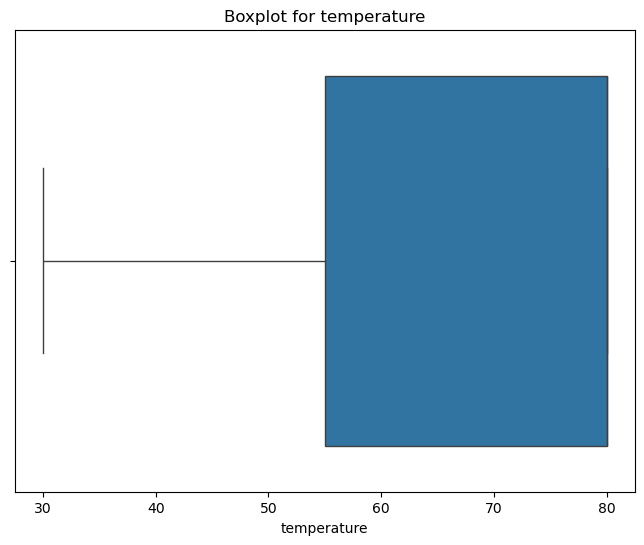

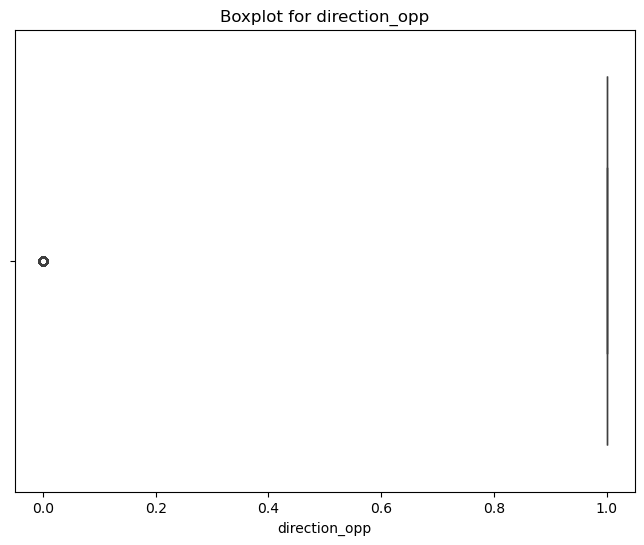

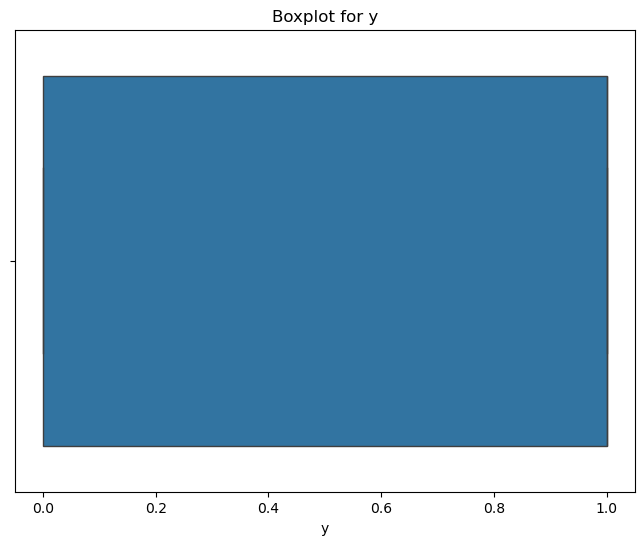

In [841]:
# Step 7: Check for outliers in numerical columns (if any)
# We can use boxplots to visualize outliers
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

In [844]:
# Fill missing values in columns with the mode
customer_coupons_data['car'] = customer_coupons_data['car'].fillna(customer_coupons_data['car'].mode()[0])
customer_coupons_data['bar'] = customer_coupons_data['bar'].fillna(customer_coupons_data['bar'].mode()[0])
customer_coupons_data['coffeehouse'] = customer_coupons_data['coffeehouse'].fillna(customer_coupons_data['coffeehouse'].mode()[0])
customer_coupons_data['carryaway'] = customer_coupons_data['carryaway'].fillna(customer_coupons_data['carryaway'].mode()[0])
customer_coupons_data['restaurantlessthan20'] = customer_coupons_data['restaurantlessthan20'].fillna(customer_coupons_data['restaurantlessthan20'].mode()[0])
customer_coupons_data['restaurant20to50'] = customer_coupons_data['restaurant20to50'].fillna(customer_coupons_data['restaurant20to50'].mode()[0])

4. What proportion of the total observations chose to accept the coupon?

In [847]:
#Steps to Calculate the Proportion:
# Count the number of acceptances (y = 1) and rejections (y = 0)
num_acceptances = customer_coupons_data['y'].sum()
print(num_acceptances)

# Calculate the total number of observations
total_observations = len(customer_coupons_data)
print(total_observations)

# Calculate the proportion of acceptances
proportion_acceptance = num_acceptances / total_observations

# Print the result
print(f"Proportion of observations that accepted the coupon: {proportion_acceptance:.2f}")

7157
12610
Proportion of observations that accepted the coupon: 0.57


5. Use a bar plot to visualize the `coupon` column.

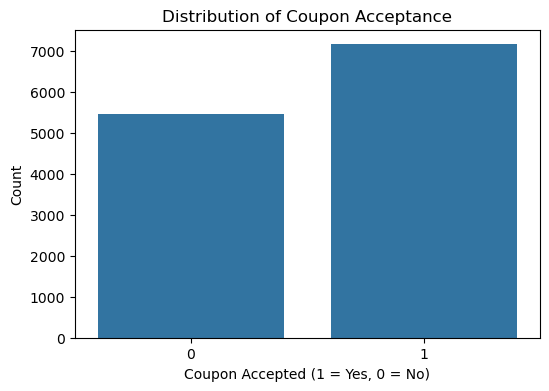

In [850]:
# Plot the distribution of the 'coupon' column
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=customer_coupons_data)  

# Add labels and title
plt.title('Distribution of Coupon Acceptance')
plt.xlabel('Coupon Accepted (1 = Yes, 0 = No)')
plt.ylabel('Count')

# Show the plot
plt.show()

6. Use a histogram to visualize the temperature column.

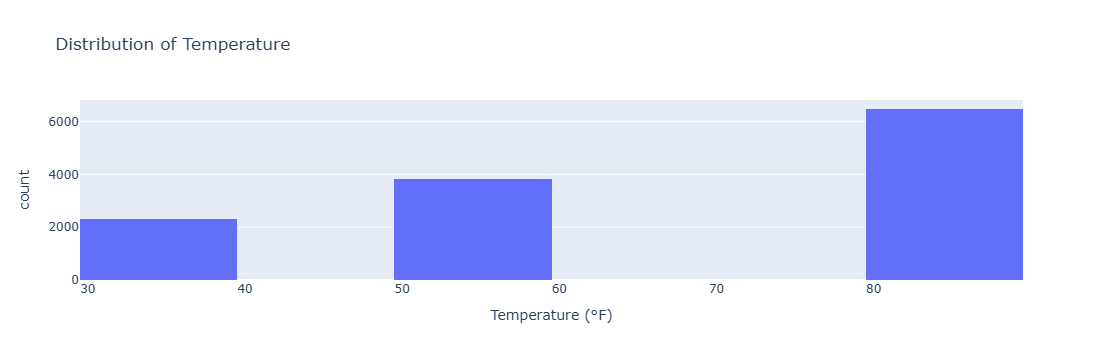

In [853]:
import plotly.express as px
# Create the histogram
fig = px.histogram(customer_coupons_data, x='temperature', title="Distribution of Temperature", 
                   labels={'temperature': 'Temperature (°F)'}, nbins=10)

# Show the plot
fig.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [856]:
# Create a new DataFrame that contains only bar coupons
bar_coupons_df = customer_coupons_data[customer_coupons_data['coupon'] == 'Bar']

# Display the first few rows to confirm
#print(bar_coupons_df.head())

2. What proportion of bar coupons were accepted?


In [859]:
# Step 1: Count the number of accepted bar coupons (where y = 1)
num_accepted_bar_coupons = bar_coupons_df['y'].sum()

# Step 3: Calculate the total number of bar coupons
total_bar_coupons = len(bar_coupons_df)

# Step 4: Calculate the proportion of accepted bar coupons
proportion_accepted_bar_coupons = num_accepted_bar_coupons / total_bar_coupons

# Display the result
print(f"Proportion of bar coupons accepted: {proportion_accepted_bar_coupons:.2f}")


Proportion of bar coupons accepted: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [862]:
# Step 1: Create two groups based on bar frequency
bar_group_3orfewertimes = bar_coupons_df[bar_coupons_df['bar'].isin(['never', 'less1', '1~3'])]  # 3 or fewer times a month
#print(len(bar_group_3orfewertimes))
bar_group_morethan3times = bar_coupons_df[bar_coupons_df['bar'].isin(['gt8', '4~8'])]   # More than 3 times a month
#print(len(bar_group_morethan3times))

# Step 2: Calculate the acceptance rate for each group
acceptance_rate_bar_lessthan3times = bar_group_3orfewertimes['y'].mean()
acceptance_rate_bar_morethan3times = bar_group_morethan3times['y'].mean()

# Step 3: Print the results
print(f"Acceptance rate for those who go to a bar 3 or fewer times a month: {acceptance_rate_bar_lessthan3times:.2f}")
print(f"Acceptance rate for those who go to a bar more than 3 times a month: {acceptance_rate_bar_morethan3times:.2f}")


Acceptance rate for those who go to a bar 3 or fewer times a month: 0.37
Acceptance rate for those who go to a bar more than 3 times a month: 0.77


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [894]:
#Since age is having string values, age: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
#Let's convert all these to int.
bar_coupons_df.loc[bar_coupons_df['age'] == '50plus', 'Age'] = '51'
bar_coupons_df.loc[bar_coupons_df['age'] == 'below21', 'Age'] = '20'

bar_coupons_df.loc[:, 'age'] = pd.to_numeric(bar_coupons_df['age'], errors='coerce')

# Drop rows with NaN in 'Age' column (optional based on your handling of missing data)
bar_coupons_df = bar_coupons_df.dropna(subset=['age'])

# Convert 'Age' to integer type
bar_coupons_df.loc[:, 'age'] = bar_coupons_df['age'].astype(int)

# Step 1: Define the two groups
bar_ageover25 = bar_coupons_df[(bar_coupons_df['bar'].isin(['1~3','gt8', '4~8']) & (bar_coupons_df['age'] > 25))]  # Bar > 1 time a month and age > 25
#print(len(bar_ageover25))

bar_others = bar_coupons_df[~(bar_coupons_df['bar'].isin(['1~3','gt8', '4~8']) & (bar_coupons_df['age'] > 25))]  # All other drivers
#print(len(bar_others))

# Step 2: Calculate the acceptance rate for each group
acceptance_rate_bar_ageover25 = bar_ageover25['y'].mean()
acceptance_rate_bar_others = bar_others['y'].mean()

# Step 3: Print the results
print(f"Acceptance rate for drivers who go to a bar more than once a month and are over 25: {acceptance_rate_bar_ageover25:.2f}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_bar_others:.2f}")

Acceptance rate for drivers who go to a bar more than once a month and are over 25: 0.70
Acceptance rate for all other drivers: 0.36


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [868]:
# Step 1: Define the two groups based on the conditions
# Filter drivers who go to bars more than once a month
#print(len(bar_coupons_df))

bar_morethanonce_month = (bar_coupons_df['bar'].isin(['1~3','gt8', '4~8']))

# Filter for passengers that are not "kid"s"
bar_non_kids_passengers = (bar_coupons_df['passanger'] != 'Kid(s)')

# Filter for occupations other than "Farming, Fishing, and Forestry"
bar_no_farm_fish_forestry = ~bar_coupons_df['occupation'].isin(['Farming Fishing & Forestry'])

combined_filters_group = bar_coupons_df[bar_morethanonce_month & bar_non_kids_passengers & bar_no_farm_fish_forestry]
other_group = bar_coupons_df[~(bar_morethanonce_month & bar_non_kids_passengers & bar_no_farm_fish_forestry)]

acceptance_rate_group_1 = combined_filters_group['y'].mean()
acceptance_rate_group_2 = other_group['y'].mean()


# Step 3: Print the results
print(f"Acceptance rate for drivers who go to bars more than once a month, have no kids as passengers, and have non-farming, fishing, or forestry occupations: {acceptance_rate_group_1:.2f}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_group_2:.2f}")

Acceptance rate for drivers who go to bars more than once a month, have no kids as passengers, and have non-farming, fishing, or forestry occupations: 0.71
Acceptance rate for all other drivers: 0.30


# 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [871]:
# Step 1: Define the conditions for Group 1
condition_1 = (bar_coupons_df['bar'].isin(['1~3','gt8', '4~8'])) & (bar_coupons_df['passanger'] != 'Kid(s)') & (bar_coupons_df['maritalstatus'] != 'Widowed')
condition_2 = (bar_coupons_df['bar'].isin(['1~3','gt8', '4~8'])) & (bar_coupons_df['age'].isin(['21','26','below21']))
condition_3 = (bar_coupons_df['restaurantlessthan20'].isin(['4~8','gt8'])) & (bar_coupons_df['income'].isin(['Less than $12500']))


# Step 2: Combine the conditions using logical OR (|) to create Group 1
group_1 = bar_coupons_df[condition_1 | condition_2 | condition_3]

# Step 3: Define Group 2 (all other drivers who don't meet any of the conditions)
group_2 = bar_coupons_df[~(condition_1 | condition_2 | condition_3)]

# Step 4: Calculate the acceptance rate for each group
acceptance_rate_group_1 = group_1['y'].mean()
acceptance_rate_group_2 = group_2['y'].mean()


# Step 5: Print the results
print(f"Acceptance rate for drivers meeting any of the three conditions (Group 1): {acceptance_rate_group_1:.2f}")
print(f"Acceptance rate for all other drivers (Group 2): {acceptance_rate_group_2:.2f}")

Acceptance rate for drivers meeting any of the three conditions (Group 1): 0.67
Acceptance rate for all other drivers (Group 2): 0.30


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

1. Frequent Bar-Goers Are More Likely to Accept Bar Coupons:
Drivers who go to bars more frequently are more likely to accept bar coupons. This aligns with the finding that those who visit bars more than 3 times a month have a higher acceptance rate (77%) compared to those who visit bars 3 or fewer times (37%).
Frequent bar-goers are likely to have a stronger interest in trying new places or getting discounts for bars they already frequent. They may be more motivated by the opportunity to save money on their regular social activities.

2. Older Drivers (Over Age 25) Are More Likely to Accept Bar Coupons:
Drivers who are over the age of 25, especially those who visit bars more than once a month, are more likely to accept bar coupons.
Older drivers (25 and above) may have more disposable income or established social habits that make them more willing to accept offers for entertainment such as bar visits. Additionally, they may be less influenced by novelty (compared to younger drivers) and may prefer bar coupons as part of regular leisure or social activities.

3. Drivers with Non-Kid Passengers Are More Likely to Accept Bar Coupons:
Drivers who are not traveling with children are more likely to accept bar coupons.
Traveling with children may limit the ability or interest in going to a bar, as bars are typically not family-friendly environments. Drivers who have adult companions (partners, friends) or are traveling alone are more likely to accept bar coupons, as the setting is more conducive to adult-only activities.

4. Drivers in Non-Farming Occupations Are More Likely to Accept Bar Coupons:
Drivers with occupations other than farming, fishing, or forestry are more likely to accept bar coupons.
Occupations like farming, fishing, or forestry are often associated with a rural lifestyle, where bar-going may be less frequent or less culturally emphasized compared to urban or suburban areas. Drivers in more urbanized occupations may be more social and open to accepting bar-related offers.

5. Younger Drivers (Under Age 30) Are Less Likely to Accept Bar Coupons:
Drivers under the age of 30 who do not go to bars frequently may be less likely to accept bar coupons.
Younger drivers, especially those who don’t go to bars frequently, may be less interested in bar-related discounts. They may be more inclined toward different activities or venues, such as cafes, restaurants, or online entertainment, and therefore may not respond as positively to bar coupons.


6. Drivers Who Visit Cheap Restaurants Frequently May Be More Likely to Accept Bar Coupons:
Drivers who frequent cheap restaurants (e.g., more than 4 times a month) and have an income under $50K may be more likely to accept bar coupons.
People who frequently dine at affordable restaurants might be more price-sensitive and motivated by opportunities to save money. A bar coupon offers a discount for a social activity that aligns with their budget-conscious behavior, making them more likely to take advantage of the offer.

7. Drivers Who Meet Multiple Conditions Are More Likely to Accept Bar Coupons:
Drivers who meet multiple conditions (e.g., visit bars frequently, are under 30, or have non-kid passengers) are more likely to accept bar coupons.
When several factors align (e.g., lifestyle, preferences, and social behavior), drivers are more likely to accept a coupon. For instance, younger, social drivers who frequent bars and have a more flexible social schedule may be highly motivated to act on offers, such as a bar coupon.


Conclusion:
Given the trends in acceptance rates, it seems that drivers who accept bar coupons are more likely to be regular bar-goers (more than once a month), particularly those who are over 25, without children as passengers, and work in non-rural occupations. These individuals are likely to have higher disposable income, more social or leisure time, and greater familiarity with or interest in promotions like bar coupons. Additionally, younger drivers or those with children as passengers might be less likely to accept the coupons, as they may have less interest in frequenting bars or fewer opportunities to use such offers.



<Figure size 1000x600 with 0 Axes>

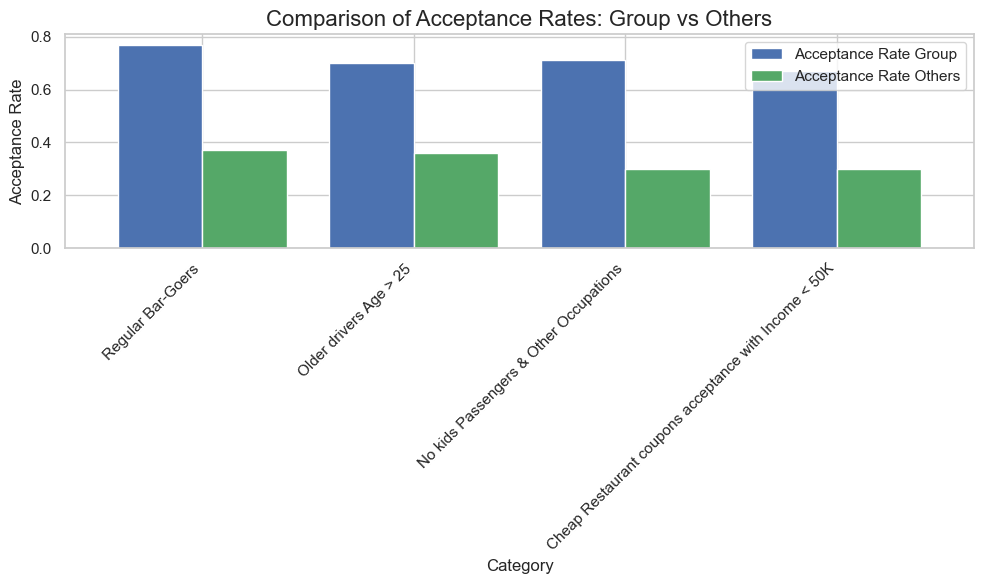

In [908]:
# Define the data - Visualisation for Bar Coupons
coupons_data = {
    'Category': [
        'Regular Bar-Goers',
        'Older drivers Age > 25',
        'No kids Passengers & Other Occupations',
        'Cheap Restaurant coupons acceptance with Income < 50K'
    ],
    'Acceptance Rate Group': [0.77, 0.70, 0.71, 0.67],
    'Acceptance Rate Others': [0.37, 0.36, 0.30, 0.30]
}

# Create DataFrame
coupons_data_df = pd.DataFrame(coupons_data)

# Set the style and color palette for the plot
sns.set(style="whitegrid")

# Create the barplot
plt.figure(figsize=(10, 6))

# Plotting both acceptance rates for group and others
coupons_data_df.plot(x='Category', kind='bar', stacked=False, figsize=(10, 6), color=['#4c72b0', '#55a868'], width=0.8)

# Rotate the labels for better visibility
plt.xticks(rotation=45, ha='right')

# Title and labels
plt.title('Comparison of Acceptance Rates: Group vs Others', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [876]:
#Get the data for the observations where coupouns are restaurants<20

restaurant_data_lessthan_20dollar = customer_coupons_data[customer_coupons_data['coupon'] == 'Restaurant(<20)']

In [878]:
#What proportion of restaurants<20 coupons are accepted?
# Step 1: Count the number of accepted restaurants<20 coupons (where y = 1)
num_accepted_restaurants20_coupons = restaurant_data_lessthan_20dollar['y'].sum()

# Step 3: Calculate the total number of restaurants<20 coupons
total_restaurants20_coupons = len(restaurant_data_lessthan_20dollar)

# Step 4: Calculate the proportion of accepted restaurants<20 coupons
proportion_accepted_restaurants20_coupons = num_accepted_bar_coupons / total_bar_coupons

# Display the result
print(f"Proportion of restaurants20 coupons accepted: {proportion_accepted_restaurants20_coupons:.2f}")

Proportion of restaurants20 coupons accepted: 0.41


In [880]:
# Compare the acceptance rate between those who went to a restaurants20 3 or fewer times a month to those who went more.
# Step 1: Create two groups based on bar frequency
group_1 = restaurant_data_lessthan_20dollar[restaurant_data_lessthan_20dollar['restaurantlessthan20'].isin(['never', 'less1', '1~3'])]  # 3 or fewer times a month
group_2 = restaurant_data_lessthan_20dollar[restaurant_data_lessthan_20dollar['restaurantlessthan20'].isin(['gt8', '4~8'])]   # More than 3 times a month

# Step 2: Calculate the acceptance rate for each group
acceptance_rate_group_1 = group_1['y'].mean()
acceptance_rate_group_2 = group_2['y'].mean()

# Step 3: Print the results
print(f"Acceptance rate for those who go to a restaurants20 3 or fewer times a month: {acceptance_rate_group_1:.2f}")
print(f"Acceptance rate for those who go to a restaurants20 more than 3 times a month: {acceptance_rate_group_2:.2f}")

Acceptance rate for those who go to a restaurants20 3 or fewer times a month: 0.69
Acceptance rate for those who go to a restaurants20 more than 3 times a month: 0.73


In [882]:
# Compare the acceptance rate between drivers who go to a restaurants20 more than once a month and are over the age of 25 to the all others.  Is there a difference?
#Since age is having string values, age: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
#Let's convert all these to int.
data_with_cleaned_age = restaurant_data_lessthan_20dollar.copy()
data_with_cleaned_age['age'] = pd.to_numeric(data_with_cleaned_age['age'], errors='coerce')

# Step 1: Define the two groups
group_1 = data_with_cleaned_age[(data_with_cleaned_age['restaurantlessthan20'].isin(['1~3','gt8', '4~8']) & (data_with_cleaned_age['age'] > 25))]  # Bar > 1 time a month and age > 25

group_2 = data_with_cleaned_age[~(data_with_cleaned_age['restaurantlessthan20'].isin(['1~3','gt8', '4~8']) & (data_with_cleaned_age['age'] > 25))]  # All other drivers

# Step 2: Calculate the acceptance rate for each group
acceptance_rate_group_1 = group_1['y'].mean()
acceptance_rate_group_2 = group_2['y'].mean()

# Step 3: Print the results
print(f"Acceptance rate for drivers who go to a restaurants20 more than once a month and are over 25: {acceptance_rate_group_1:.2f}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_group_2:.2f}")

Acceptance rate for drivers who go to a restaurants20 more than once a month and are over 25: 0.72
Acceptance rate for all other drivers: 0.69


In [884]:
# Use the same process to compare the acceptance rate between drivers who go to restaurants<20 with salary < 100k

group_1 = restaurant_data_lessthan_20dollar[restaurant_data_lessthan_20dollar['income'].isin(['Less than $12500'])]
group_2 = restaurant_data_lessthan_20dollar[restaurant_data_lessthan_20dollar['income'].isin(['$50000 - $62499'])]

# Step 2: Calculate the acceptance rate for each group
acceptance_rate_group_1 = group_1['y'].mean()
acceptance_rate_group_2 = group_2['y'].mean()

# Step 3: Print the results
print(f"Acceptance rate for drivers who go to a restaurants20 with salary < 100k: {acceptance_rate_group_1:.2f}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_group_2:.2f}")

Acceptance rate for drivers who go to a restaurants20 with salary < 100k: 0.72
Acceptance rate for all other drivers: 0.78


In [886]:
# Use the same process to compare the acceptance rate between drivers who go to restaurants<20 with salary < 100k and goes more than 4 times.

group_1 = restaurant_data_lessthan_20dollar[restaurant_data_lessthan_20dollar['restaurantlessthan20'].isin(['4~8','gt8'])]
group_2 = restaurant_data_lessthan_20dollar[restaurant_data_lessthan_20dollar['restaurantlessthan20'].isin(['less1'])]
#group_1.head()

# Step 2: Calculate the acceptance rate for each group

# Step 2: Calculate the acceptance rate for each group
acceptance_rate_group_1 = group_1['y'].mean()
acceptance_rate_group_2 = group_2['y'].mean()

# Step 3: Print the results
print(f"Acceptance rate for drivers who go to a restaurants20 more than 4 times a month: {acceptance_rate_group_1:.2f}")
print(f"Acceptance rate for all other drivers who goes to restaurants less than one time: {acceptance_rate_group_2:.2f}")

Acceptance rate for drivers who go to a restaurants20 more than 4 times a month: 0.73
Acceptance rate for all other drivers who goes to restaurants less than one time: 0.67


In summary, frequent diners (those who go to restaurants more than 3 times a month) and individuals with moderate incomes are more likely to accept restaurant coupons. These drivers likely have regular dining habits and are more motivated by opportunities for savings. However, other factors such as age and income also influence coupon acceptance, but the frequency of restaurant visits plays the most significant role.

<Figure size 1000x600 with 0 Axes>

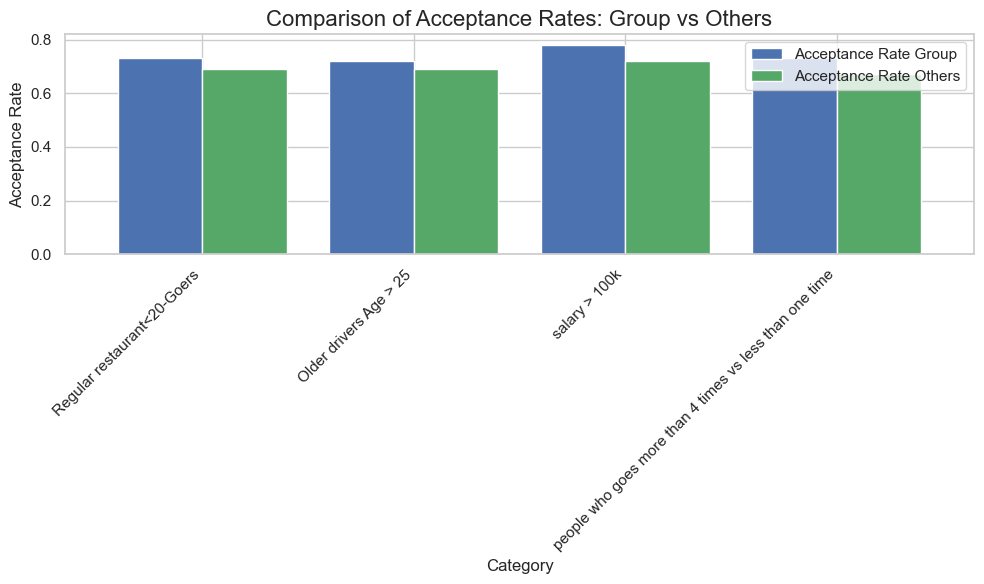

In [914]:
# Define the data - Visualisation for Restaurant<20 Coupons
coupons_data = {
    'Category': [
        'Regular restaurant<20-Goers',
        'Older drivers Age > 25',
        'salary > 100k',
        'people who goes more than 4 times vs less than one time'
    ],
    'Acceptance Rate Group': [0.73, 0.72, 0.78, 0.73],
    'Acceptance Rate Others': [0.69, 0.69, 0.72, 0.67]
}

# Create DataFrame
coupons_data_df = pd.DataFrame(coupons_data)

# Set the style and color palette for the plot
sns.set(style="whitegrid")

# Create the barplot
plt.figure(figsize=(10, 6))

# Plotting both acceptance rates for group and others
coupons_data_df.plot(x='Category', kind='bar', stacked=False, figsize=(10, 6), color=['#4c72b0', '#55a868'], width=0.8)

# Rotate the labels for better visibility
plt.xticks(rotation=45, ha='right')

# Title and labels
plt.title('Comparison of Acceptance Rates: Group vs Others', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
